In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('data/all_features_with_region.csv')

In [6]:
from sklearn.ensemble import IsolationForest

In [19]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.preprocessing import RobustScaler

In [11]:
num_only = df.drop(['region'], axis=1)

In [13]:
rs = RobustScaler()

In [14]:
num_only_scaled = rs.fit_transform(num_only)

In [16]:
from sklearn.manifold import TSNE

In [17]:
X_embedded = TSNE(n_components=2).fit_transform(num_only_scaled)

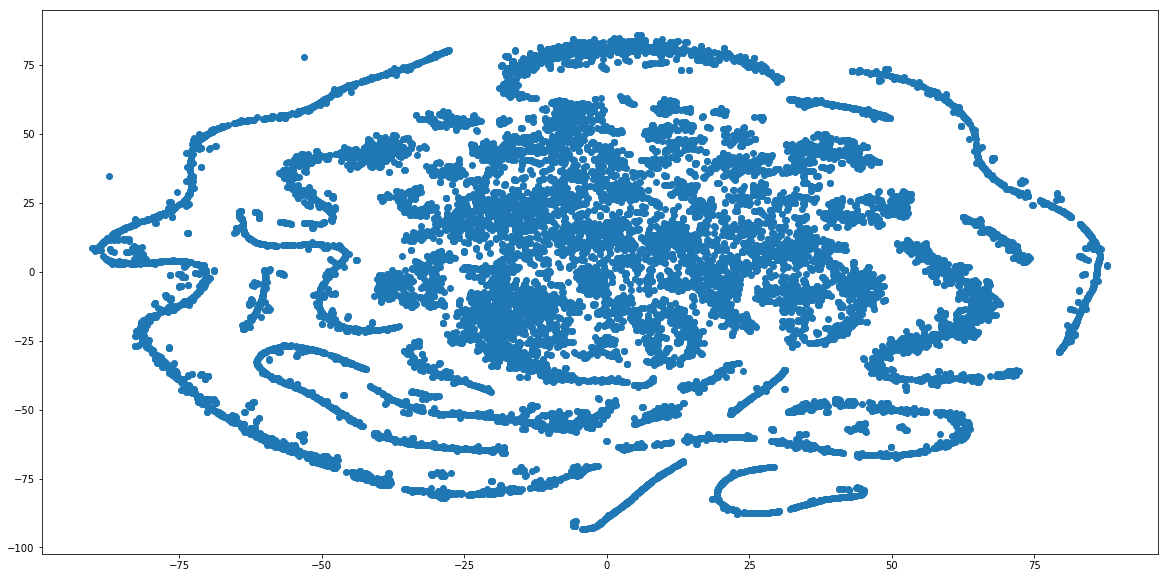

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

In [28]:
np.argsort(X_embedded, key=lambda x: abs(x[0]) + abs(x[1]))

TypeError: argsort() got an unexpected keyword argument 'key'

In [31]:
srt = np.argsort(list(map(
    lambda x: abs(x[0]) + abs(x[1]),
    X_embedded
)))

In [30]:
names = pd.read_csv('data/all_names.csv')

In [32]:
common = srt[:5]
anomany = srt[-5:]

In [37]:
for idx in common:
    print(names.iloc[idx]['name'], "https://declarator.org/person/{}/".format(names.iloc[idx]['id']))

Марченко Михаил Александрович https://declarator.org/person/4823/
Шаповал Дмитрий Викторович https://declarator.org/person/17912/
Наумкин Игорь Викторович https://declarator.org/person/38165/
Рузаев Игорь Николаевич https://declarator.org/person/30613/
Стародубцев Сергей Иванович https://declarator.org/person/13382/


In [39]:
for idx in anomany:
    print(names.iloc[idx]['name'], "https://declarator.org/person/{}/".format(names.iloc[idx]['id']))

Редькин Игорь Владимирович https://declarator.org/person/12966/
Ермакова Светлана  Яковлевна https://declarator.org/person/33914/
Чунчель Игорь Владимирович https://declarator.org/person/15134/
Песков Валерий Борисович https://declarator.org/person/14949/
Коротков Алексей Владимирович https://declarator.org/person/2067/
